In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [2]:
# Завантаження та підготовка даних
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0  # Нормалізація значень пікселів до діапазону [0, 1]
y_train, y_test = to_categorical(y_train), to_categorical(y_test)

In [3]:
# Створення згорткової нейронної мережі
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [4]:
# Компіляція моделі
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [5]:
# Виведення структури моделі
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

In [6]:
# Навчання моделі
history = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_test, y_test))

Epoch 1/10
782/782 [==============================] - 30s 37ms/step - loss: 1.5703 - accuracy: 0.4275 - val_loss: 1.4178 - val_accuracy: 0.4866
Epoch 2/10
782/782 [==============================] - 27s 35ms/step - loss: 1.2386 - accuracy: 0.5579 - val_loss: 1.1479 - val_accuracy: 0.5906
Epoch 3/10
782/782 [==============================] - 30s 38ms/step - loss: 1.0859 - accuracy: 0.6182 - val_loss: 1.0600 - val_accuracy: 0.6280
Epoch 4/10
782/782 [==============================] - 28s 36ms/step - loss: 0.9876 - accuracy: 0.6539 - val_loss: 1.0052 - val_accuracy: 0.6485
Epoch 5/10
782/782 [==============================] - 28s 36ms/step - loss: 0.9066 - accuracy: 0.6835 - val_loss: 0.9743 - val_accuracy: 0.6650
Epoch 6/10
782/782 [==============================] - 29s 37ms/step - loss: 0.8440 - accuracy: 0.7038 - val_loss: 0.9475 - val_accuracy: 0.6754
Epoch 7/10
782/782 [==============================] - 28s 36ms/step - loss: 0.7885 - accuracy: 0.7235 - val_loss: 0.8943 - val_accuracy:

In [7]:
# Оцінка моделі на тестовому наборі
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc}')

313/313 [==============================] - 2s 7ms/step - loss: 0.8925 - accuracy: 0.7003
Test accuracy: 0.7002999782562256


Візуалізація результатів

In [8]:
plt.figure(figsize=(12, 4))

<Figure size 1200x400 with 0 Axes>

<Figure size 1200x400 with 0 Axes>

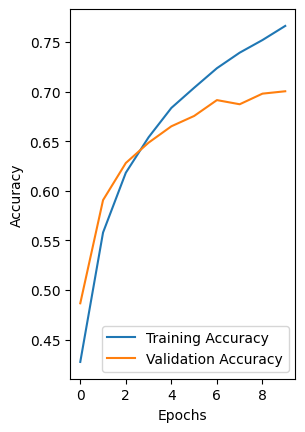

In [9]:
# Графік точності
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

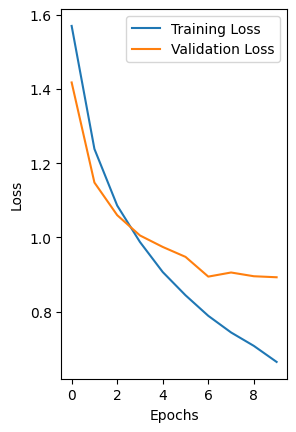

In [10]:
# Графік функції втрат
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

Висновок:

Приймаючи до уваги результати роботи моделі на тестовому наборі, а також отримані графіки - можна зробити висновок що кількість шарів, функції активації, розмір batch_size та кількіть епох навчання були підібрані оптимально.